In [398]:
# Import libraries
import locale
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [399]:
# Set file paths
whale_returns_path = Path("../Resources/whale_returns.csv")
algo_returns_path = Path("../Resources/algo_returns.csv")
sp500_history_path = Path("../Resources/sp500_history.csv")

# Read the individual CSV datasets
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [400]:
# Reading whale returns
whale_returns.head()
whale_returns.isnull().sum()

# Drop the first row as it's the only row with null values
whale_returns.dropna(inplace=True)

# Reading algo returns
algo_returns.head()
algo_returns.isnull().sum()

# Drop the nulls
algo_returns.dropna(inplace=True)

# Reading S&P 500 Closing Prices and sort by index
sp500_history.head()
sp500_history.isnull().sum()
sp500_history.sort_index(inplace=True)
sp500_history.dtypes

# Strip the $ from the string and convert to float (This code was referenced at https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas)
locale.setlocale(locale.LC_ALL,'')
sp500_history['Close'] = sp500_history.Close.map(lambda x: locale.atof(x.strip('$')))

# Add Daily Returns column and calculate
sp500_history['S&P 500'] = sp500_history['Close'].pct_change()

# Drop nulls
sp500_history.dropna(inplace=True)

# Rename `Close` Column to be specific to this portfolio.
#sp500_history.rename(columns={'Close':'S&P 500 Close'}, inplace=True)

# Drop Close prices from sp500
sp500_history.drop(['Close'], axis= 1, inplace=True)

In [401]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_history], axis='columns',join='inner')

In [402]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [403]:
# Calculate Daily Returns


<AxesSubplot:xlabel='Date'>

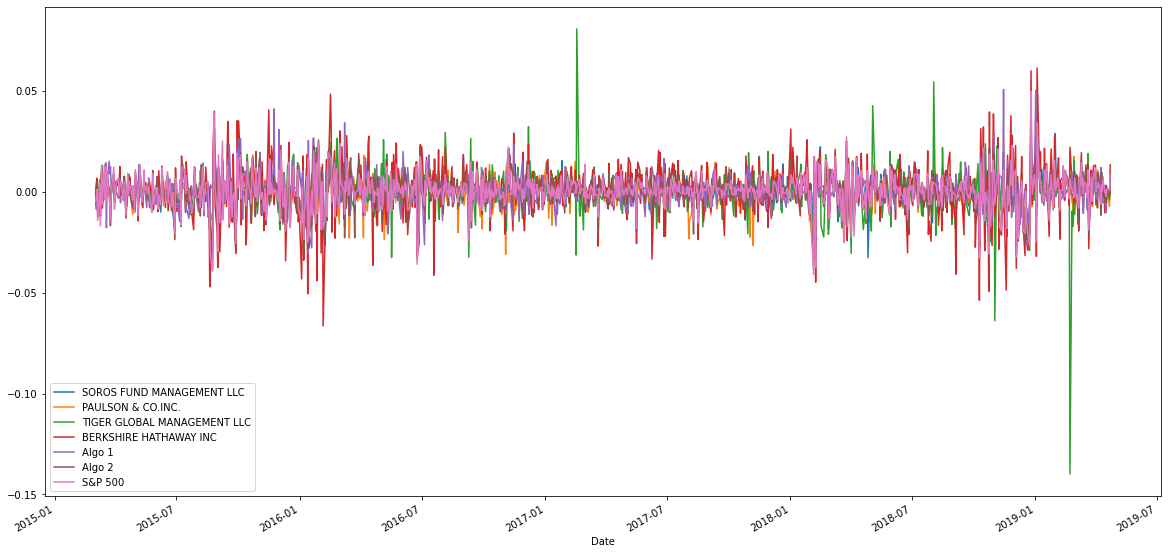

In [404]:
combined_df.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

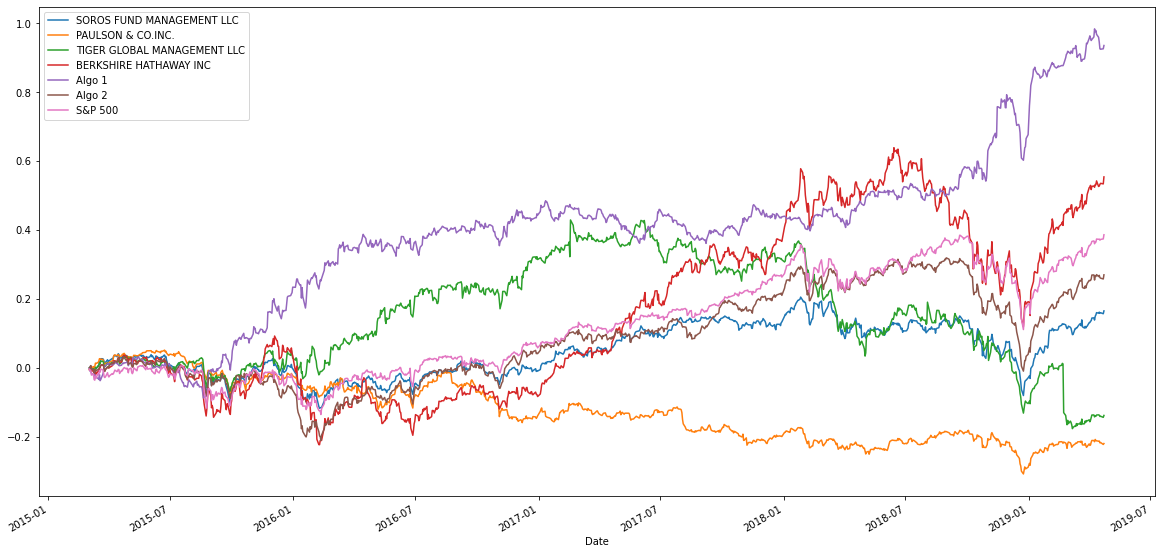

In [405]:
# Calculate and plot cumulative returns
cumulative_returns = (1+combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

In [406]:
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986


<AxesSubplot:>

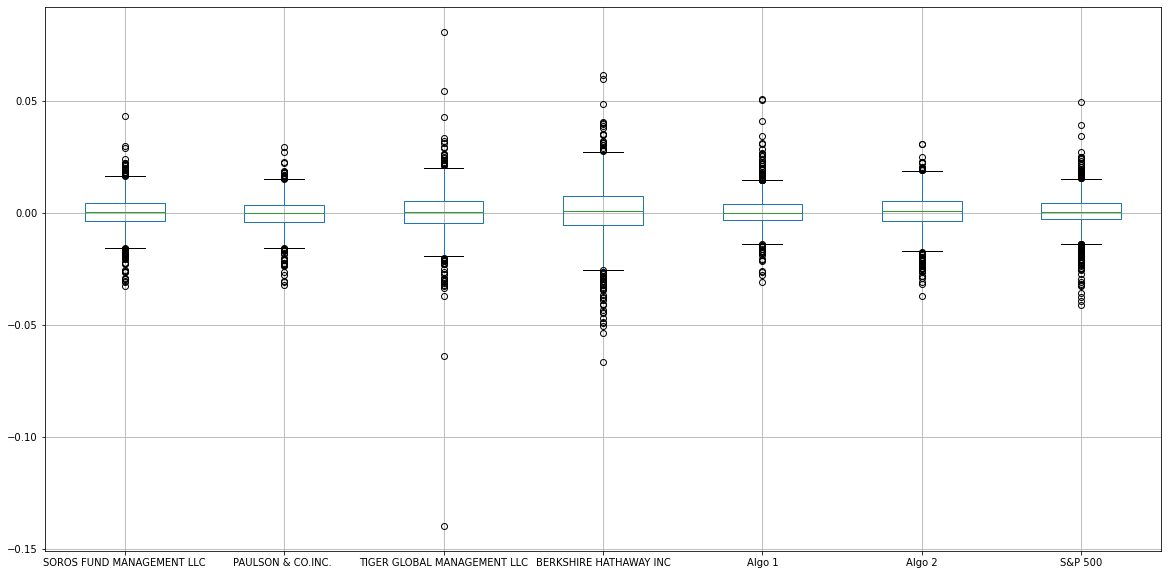

In [407]:
# Create a box plot for each portfolio
combined_df.boxplot(figsize=(20,10))

In [408]:
# Calculate the standard deviation for all portfolios
daily_st_devs = combined_df.std()


In [409]:
# 

In [410]:
# Determine which portolios are riskier than the S&P 500
## Using standard deviation as our only indicator of risk, we can see that only two portfolios are riskier than the S&P 500. Namely, Berkshire Hathaway and Tiger Global Management, which have daily standard deviations of 0.012919 and 0.010894, respecitively. The other 4 portfolios are less risky because they have less standard deviation than the index.


In [411]:
# Calculate annualized standard deviation
annual_st_devs = combined_df.std()/np.sqrt(252)

In [412]:
annual_st_devs

SOROS FUND MANAGEMENT LLC      0.000497
PAULSON & CO.INC.              0.000442
TIGER GLOBAL MANAGEMENT LLC    0.000686
BERKSHIRE HATHAWAY INC         0.000814
Algo 1                         0.000480
Algo 2                         0.000526
S&P 500                        0.000539
dtype: float64

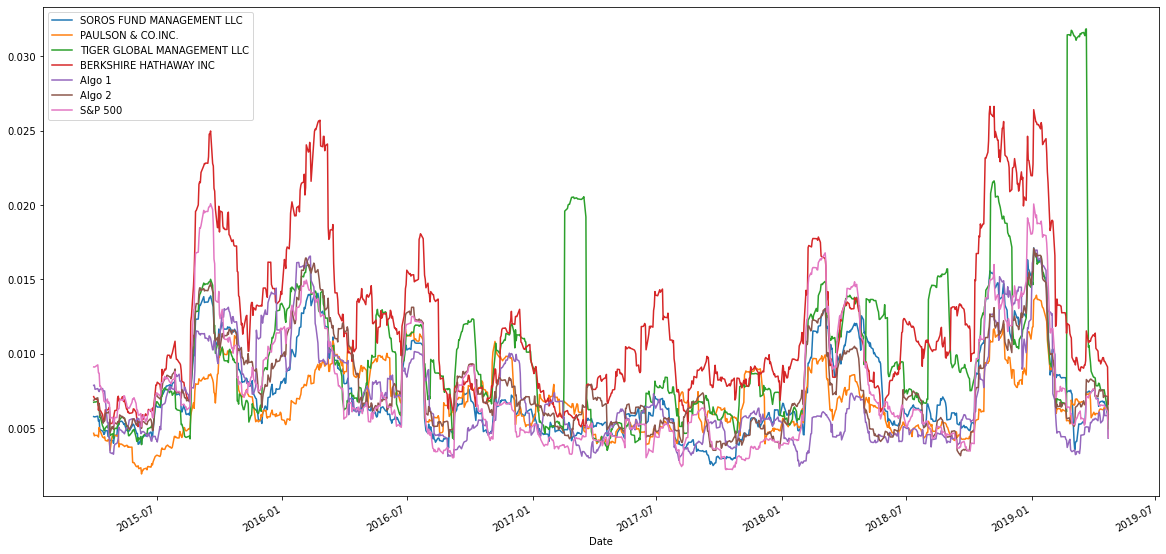

In [413]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day_st_devs = combined_df.rolling(window=21).std().plot(figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


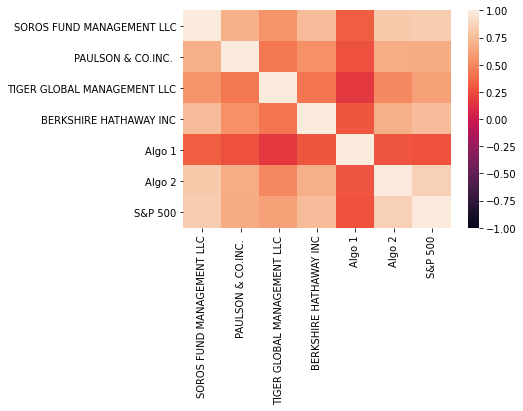

In [414]:
#Calculate and plot the correlation
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

## Based on the heatmap and table representing correlation, Algo 2, Soros Fund Management and Berkshire Hathaway, all have high correlations to the S&P 500, at .859, .838 and .751, respecitvely. 

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger Global'}, xlabel='Date'>

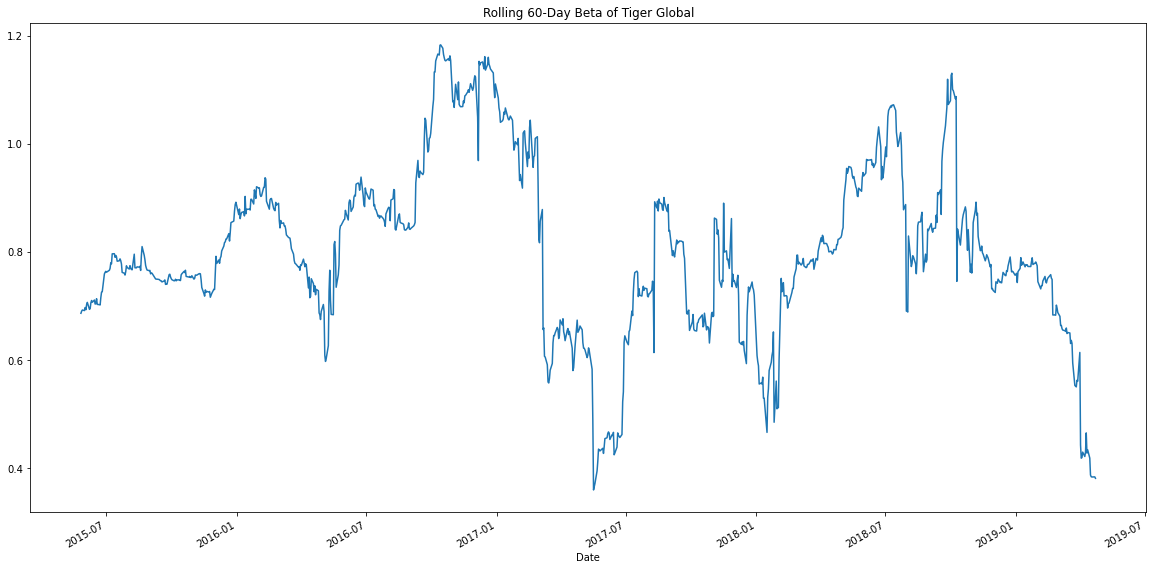

In [415]:
# Caluclate and plot the 60 day rolling beta between a chosen portfolio (Tiger) and the S&P 500
rolling_covar = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_sp_var = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covar / rolling_sp_var
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Tiger Global')

In [416]:
# Calculate and plot exponential weighted MA
# What do they want an ema of?

In [418]:
# Calculate sharpe ratios
# What are we using for the risk free rate here?
#sharpe_ratios = 